In [1]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
import numpy as np
%matplotlib inline

In [2]:
sales_of_company_x = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")

In [3]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

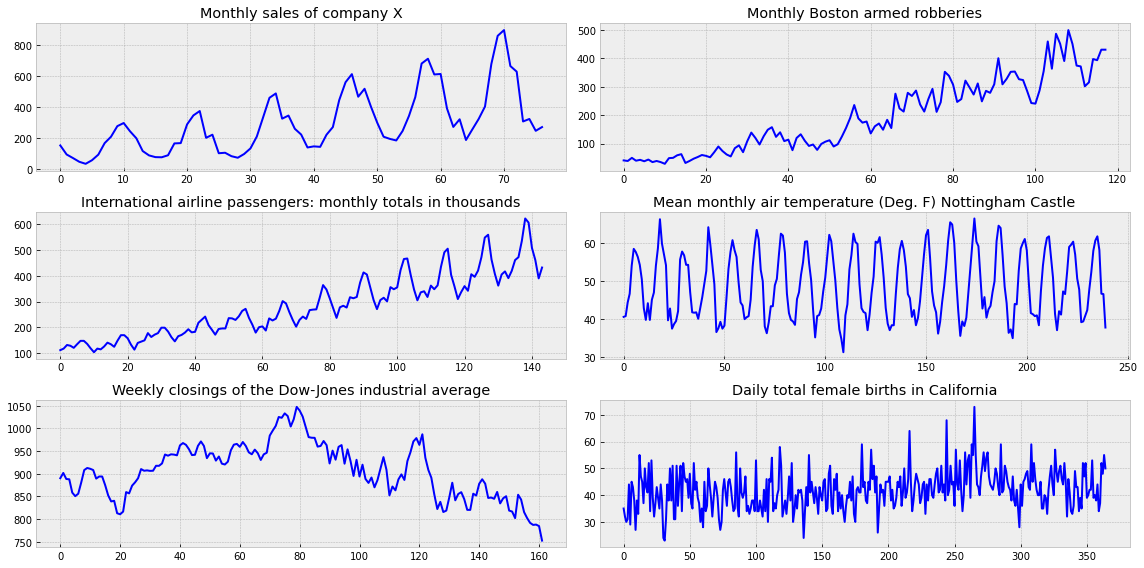

In [4]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

In [7]:
all_series_stationary = all_series.copy()
print('Results of Dickey-Fuller Test:')
for key, series in all_series.items():
    print(key)
    dftest = adfuller(series, autolag='AIC')
    p_value = dftest[1]
    print(f'p-value = {p_value}')
    if p_value > 0.05:
        series = boxcox(series, 0)
        dftest = adfuller(series, autolag='AIC')
        p_value = dftest[1]
        print(f'p-value after boxcox transformation: {p_value}')
    if p_value > 0.05:
        series = np.diff(series, 1)
        dftest = adfuller(series, autolag='AIC')
        p_value = dftest[1]
        print(f'p-value after differentiation: {p_value}')
    if p_value > 0.05:
        series = np.diff(series, 1)
        dftest = adfuller(series, autolag='AIC')
        p_value = dftest[1]
        print(f'p-value after differentiation: {p_value}')
    if p_value < 0.05:
        print('series is stationary')
    all_series_stationary[key] = pd.Series(series)
    print()

Results of Dickey-Fuller Test:
Monthly sales of company X
p-value = 0.9888894205170052
p-value after boxcox transformation: 0.785310212484911
p-value after differentiation: 0.02402539283987568
series is stationary

Monthly Boston armed robberies
p-value = 0.9942775638057232
p-value after boxcox transformation: 0.28083250354255435
p-value after differentiation: 2.378602441743682e-11
series is stationary

International airline passengers: monthly totals in thousands
p-value = 0.9918802434376411
p-value after boxcox transformation: 0.4223667747703904
p-value after differentiation: 0.07112054815085424
p-value after differentiation: 7.419304549380349e-13
series is stationary

Mean monthly air temperature (Deg. F) Nottingham Castle
p-value = 0.016989030222608986
series is stationary

Weekly closings of the Dow-Jones industrial average
p-value = 0.6224548515589742
p-value after boxcox transformation: 0.6691194827577257
p-value after differentiation: 2.751609132291384e-24
series is stationary


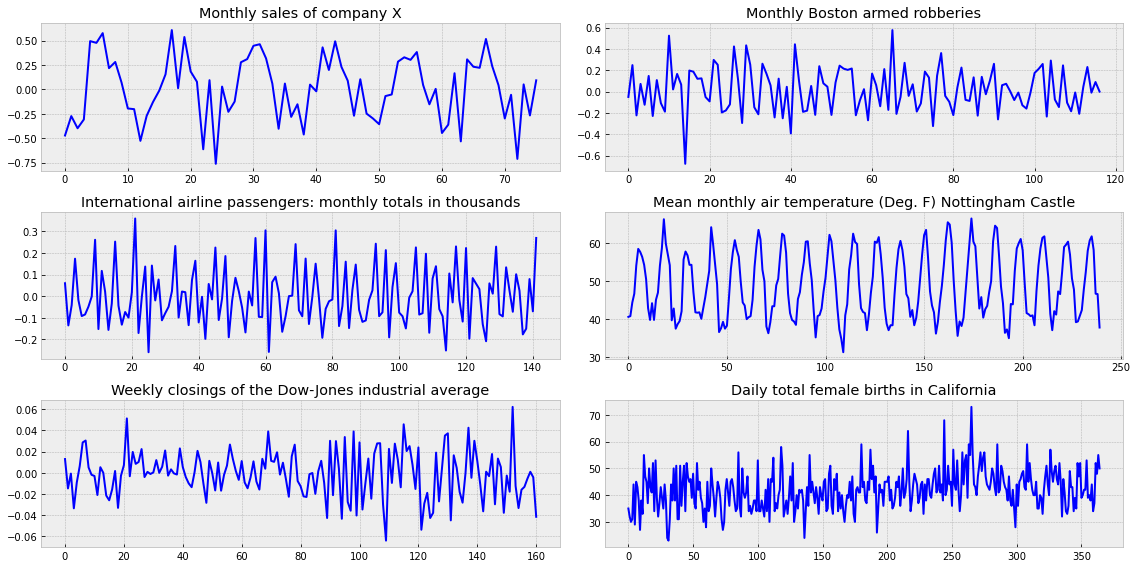

In [8]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series_stationary.keys()):
        x = i % 2
        y = int((i - x) / 2)

        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series_stationary[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)

    plt.tight_layout()